Simulación de Segmentación de Plastico

Configuracion Incial

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time

# Configuración inicial
conveyor_speed = 300  # pulgadas/seg
residue_percentages = {"machine_1": 10, "machine_2": 5, "machine_3": 2}
segment_ratios_machine_1 = {"PET": 0.5, "HDPE": 0.3, "Residuos": 0.2}
segment_ratios_machine_2 = {"PET": 0.4, "HDPE": 0.4, "Residuos": 0.2}
segment_ratios_machine_3 = {"PET Clear": 0.2, "PET Color": 0.2, "HDPE Clear": 0.3, "HDPE Color": 0.3}
relay_times = (0.5, 1.0)  # Tiempo dinámico para activar los relés en segundos
initial_material = 1000  # kg/h
cycles = 5  # Número de ciclos de simulación

Funciones

Esta función calcula el tiempo de retraso basado en la distancia y velocidad. Considera mostrar ejemplos específicos de entrada y salida como parte de la documentación o el script para pruebas paso a paso.

In [68]:
def calculate_delay(distance, speed):
    """
    Calcula el tiempo de retraso basado en la distancia y velocidad del conveyor.

    Ejemplos de uso:
        - Entrada: distancia=12, velocidad=300
        - Salida: delay=0.04 segundos

        - Entrada: distancia=21, velocidad=300
        - Salida: delay=0.07 segundos

    Parámetros:
        distance (float): Distancia en pulgadas.
        speed (float): Velocidad del conveyor en pulgadas/seg.

    Retorna:
        float: Tiempo de retraso en segundos.
    """
    delay = round(distance / speed, 2)
    print(f"[DEBUG] Calculated delay: {delay} seconds for distance {distance} inches at {speed} inches/sec")
    return delay

Esta función segmenta el material en tipos y residuos.

In [69]:
def segment_material(material, residue_percentage, segment_ratios):
    """
    Segmenta el material entre tipos y residuos.

    Ejemplo de uso:
        - Entrada:
            material=1000, residue_percentage=10, segment_ratios={"PET": 0.5, "HDPE": 0.3, "Residuos": 0.2}
        - Salida:
            {'PET': 450.0, 'HDPE': 270.0, 'Residuos': 100.0}

    Parámetros:
        material (float): Cantidad inicial de material (kg).
        residue_percentage (float): Porcentaje de residuos.
        segment_ratios (dict): Proporciones de segmentación para cada tipo.

    Retorna:
        dict: Segmentación de materiales y residuos.
    """
    residue = material * (residue_percentage / 100)
    processed_material = material - residue
    segmented = {key: processed_material * ratio for key, ratio in segment_ratios.items()}
    segmented["Residuos"] = residue
    print(f"[DEBUG] Material segmented: {segmented}")
    return segmented

Esta función genera tiempos aleatorios para activar los relays

In [70]:
def dynamic_relay_time():
    """
    Genera un tiempo aleatorio para la activación de los relés.

    Ejemplo de uso:
        Durante una simulación, se generan los siguientes tiempos aleatorios:
        - 0.63 segundos
        - 0.85 segundos
        - 0.91 segundos

    Retorna:
        float: Tiempo aleatorio en segundos.
    """
    relay_time = round(random.uniform(*relay_times), 2)
    print(f"[DEBUG] Generated relay time: {relay_time} seconds")
    return relay_time


Simula el flujo de material a través de las máquinas.

In [71]:
def simulate_machine_1(initial_material, residue_percentage, segment_ratios):
    print("[DEBUG] Simulando Máquina 1...")
    machine_1_output = segment_material(initial_material, residue_percentage, segment_ratios)
    print(f"[DEBUG] Resultado Máquina 1: {machine_1_output}")
    return machine_1_output

# Simulación para Máquina 1
machine_1_flows = simulate_machine_1(initial_material, residue_percentages["machine_1"], segment_ratios_machine_1)


[DEBUG] Simulando Máquina 1...
[DEBUG] Material segmented: {'PET': 450.0, 'HDPE': 270.0, 'Residuos': 100.0}
[DEBUG] Resultado Máquina 1: {'PET': 450.0, 'HDPE': 270.0, 'Residuos': 100.0}


In [72]:
def simulate_machine_2(input_material, residue_percentage, segment_ratios):
    print("[DEBUG] Simulando Máquina 2...")
    machine_2_output = segment_material(input_material, residue_percentage, segment_ratios)
    print(f"[DEBUG] Resultado Máquina 2: {machine_2_output}")
    return machine_2_output

# Entrada a Máquina 2 (excluyendo residuos de Máquina 1)
input_machine_2 = sum([v for k, v in machine_1_flows.items() if k != "Residuos"])
machine_2_flows = simulate_machine_2(input_machine_2, residue_percentages["machine_2"], segment_ratios_machine_2)


[DEBUG] Simulando Máquina 2...
[DEBUG] Material segmented: {'PET': 273.6, 'HDPE': 273.6, 'Residuos': 36.0}
[DEBUG] Resultado Máquina 2: {'PET': 273.6, 'HDPE': 273.6, 'Residuos': 36.0}


In [73]:
def simulate_machine_3(input_material, residue_percentage, segment_ratios):
    print("[DEBUG] Simulando Máquina 3...")
    machine_3_output = segment_material(input_material, residue_percentage, segment_ratios)
    print(f"[DEBUG] Resultado Máquina 3: {machine_3_output}")
    return machine_3_output

# Entrada a Máquina 3 (excluyendo residuos de Máquina 2)
input_machine_3 = sum([v for k, v in machine_2_flows.items() if k != "Residuos"])
machine_3_flows = simulate_machine_3(input_machine_3, residue_percentages["machine_3"], segment_ratios_machine_3)


[DEBUG] Simulando Máquina 3...
[DEBUG] Material segmented: {'PET Clear': 107.25120000000003, 'PET Color': 107.25120000000003, 'HDPE Clear': 160.87680000000003, 'HDPE Color': 160.87680000000003, 'Residuos': 10.944}
[DEBUG] Resultado Máquina 3: {'PET Clear': 107.25120000000003, 'PET Color': 107.25120000000003, 'HDPE Clear': 160.87680000000003, 'HDPE Color': 160.87680000000003, 'Residuos': 10.944}


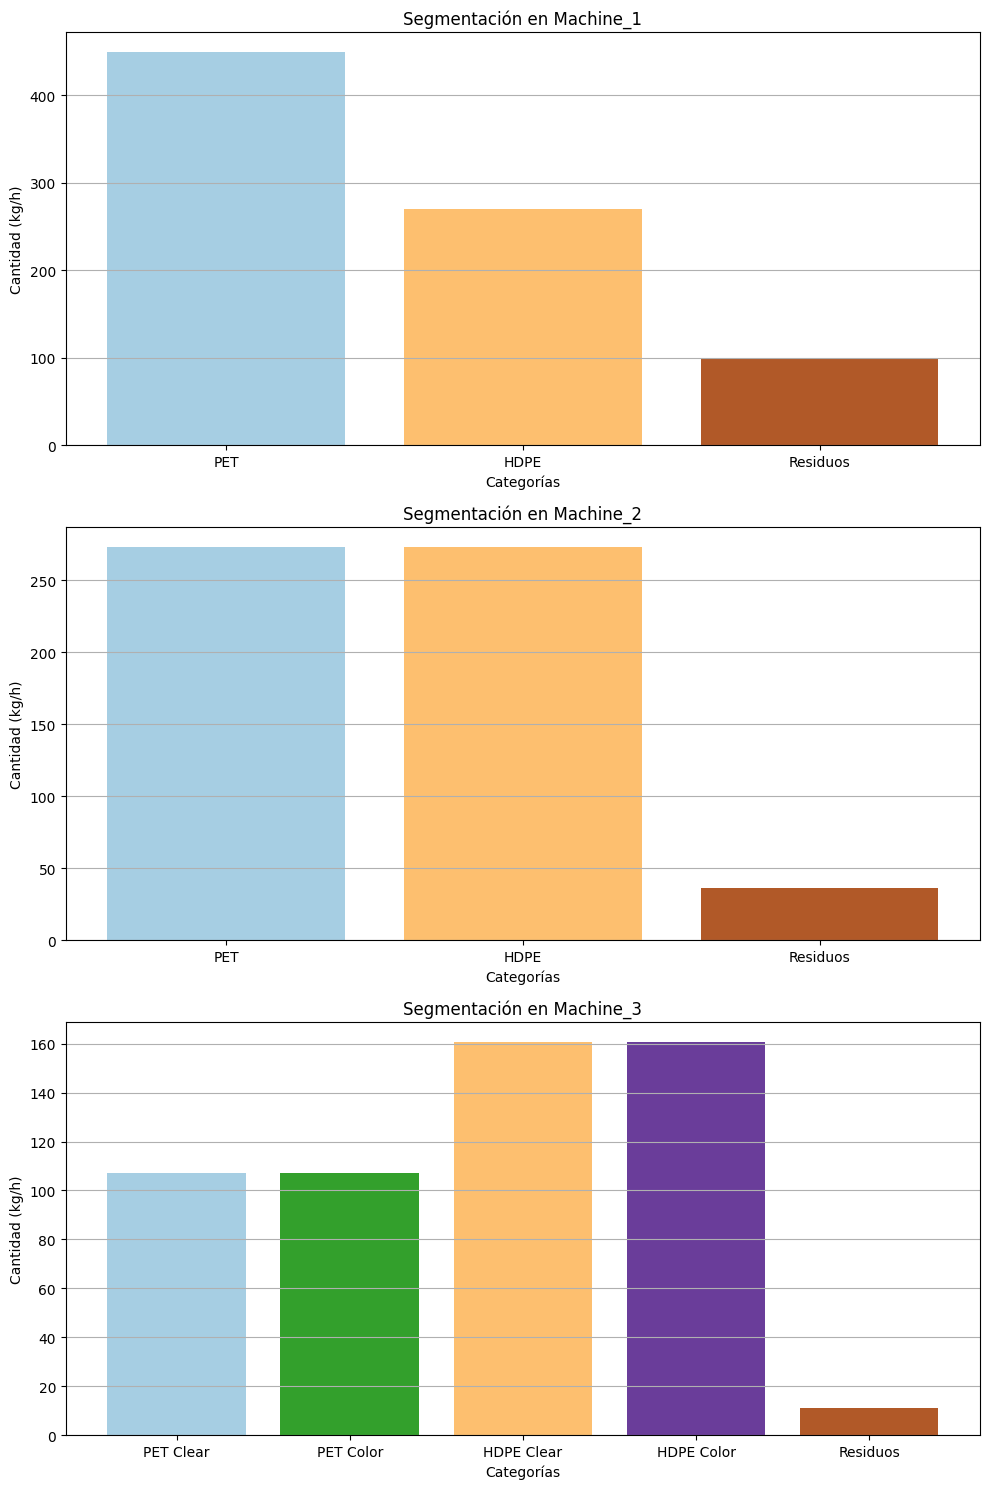

In [74]:
flows = {
    "machine_1": machine_1_flows,
    "machine_2": machine_2_flows,
    "machine_3": machine_3_flows,
}

visualize_flows(flows)


Genera gráficos de barras para visualizar la segmentación

In [75]:
def visualize_flows(flows):
    """
    Genera gráficos de barras para visualizar la segmentación.

    Ejemplo de datos ficticios:
        - Máquina 1: {'PET': 450.0, 'HDPE': 270.0, 'Residuos': 100.0}
        - Máquina 2: {'PET': 380.0, 'HDPE': 230.0, 'Residuos': 50.0}
        - Máquina 3: {'PET Clear': 190.0, 'PET Color': 190.0, 'HDPE Clear': 230.0, 'HDPE Color': 230.0}
    """
    fig, axes = plt.subplots(3, 1, figsize=(10, 15))

    for i, machine in enumerate(["machine_1", "machine_2", "machine_3"]):
        categories = list(flows[machine].keys())
        values = list(flows[machine].values())
        
        axes[i].bar(categories, values, color=plt.cm.Paired(np.linspace(0, 1, len(categories))))
        axes[i].set_title(f"Segmentación en {machine.capitalize()}")
        axes[i].set_xlabel("Categorías")
        axes[i].set_ylabel("Cantidad (kg/h)")
        axes[i].grid(axis="y")

    plt.tight_layout()
    plt.show()

Simulación

Ciclo 1 de simulación
[DEBUG] Simulando Máquina 1...
[DEBUG] Material segmented: {'PET': 450.0, 'HDPE': 270.0, 'Residuos': 100.0}
[DEBUG] Resultado Máquina 1: {'PET': 450.0, 'HDPE': 270.0, 'Residuos': 100.0}
[DEBUG] Simulando Máquina 2...
[DEBUG] Material segmented: {'PET': 273.6, 'HDPE': 273.6, 'Residuos': 36.0}
[DEBUG] Resultado Máquina 2: {'PET': 273.6, 'HDPE': 273.6, 'Residuos': 36.0}
[DEBUG] Simulando Máquina 3...
[DEBUG] Material segmented: {'PET Clear': 107.25120000000003, 'PET Color': 107.25120000000003, 'HDPE Clear': 160.87680000000003, 'HDPE Color': 160.87680000000003, 'Residuos': 10.944}
[DEBUG] Resultado Máquina 3: {'PET Clear': 107.25120000000003, 'PET Color': 107.25120000000003, 'HDPE Clear': 160.87680000000003, 'HDPE Color': 160.87680000000003, 'Residuos': 10.944}


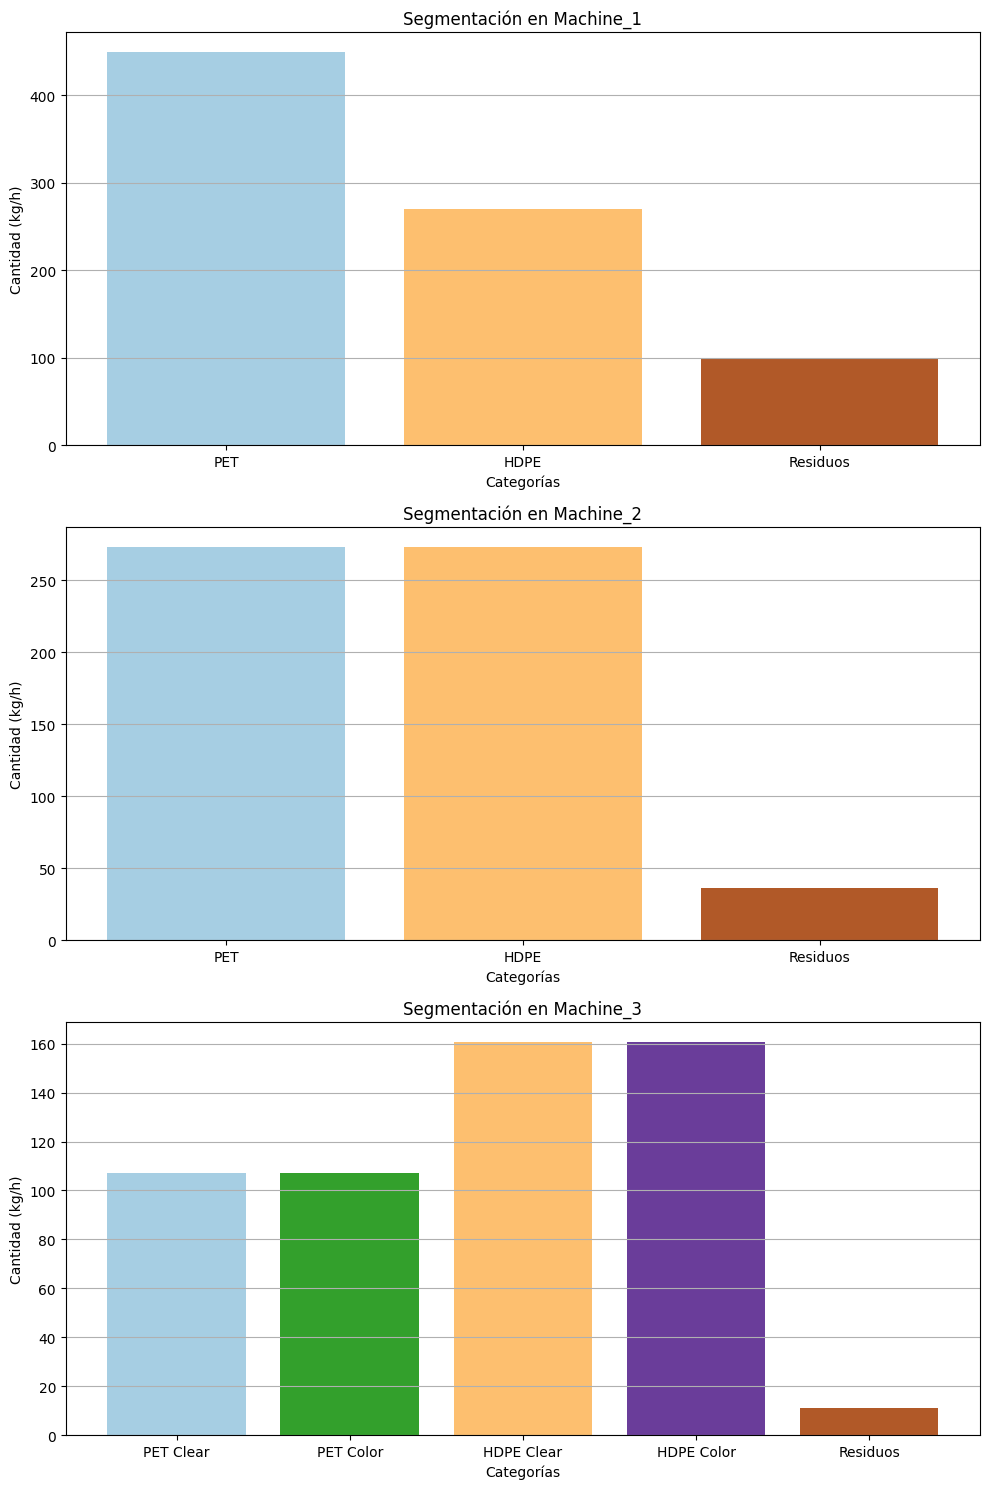

Ciclo 2 de simulación
[DEBUG] Simulando Máquina 1...
[DEBUG] Material segmented: {'PET': 450.0, 'HDPE': 270.0, 'Residuos': 100.0}
[DEBUG] Resultado Máquina 1: {'PET': 450.0, 'HDPE': 270.0, 'Residuos': 100.0}
[DEBUG] Simulando Máquina 2...
[DEBUG] Material segmented: {'PET': 273.6, 'HDPE': 273.6, 'Residuos': 36.0}
[DEBUG] Resultado Máquina 2: {'PET': 273.6, 'HDPE': 273.6, 'Residuos': 36.0}
[DEBUG] Simulando Máquina 3...
[DEBUG] Material segmented: {'PET Clear': 107.25120000000003, 'PET Color': 107.25120000000003, 'HDPE Clear': 160.87680000000003, 'HDPE Color': 160.87680000000003, 'Residuos': 10.944}
[DEBUG] Resultado Máquina 3: {'PET Clear': 107.25120000000003, 'PET Color': 107.25120000000003, 'HDPE Clear': 160.87680000000003, 'HDPE Color': 160.87680000000003, 'Residuos': 10.944}


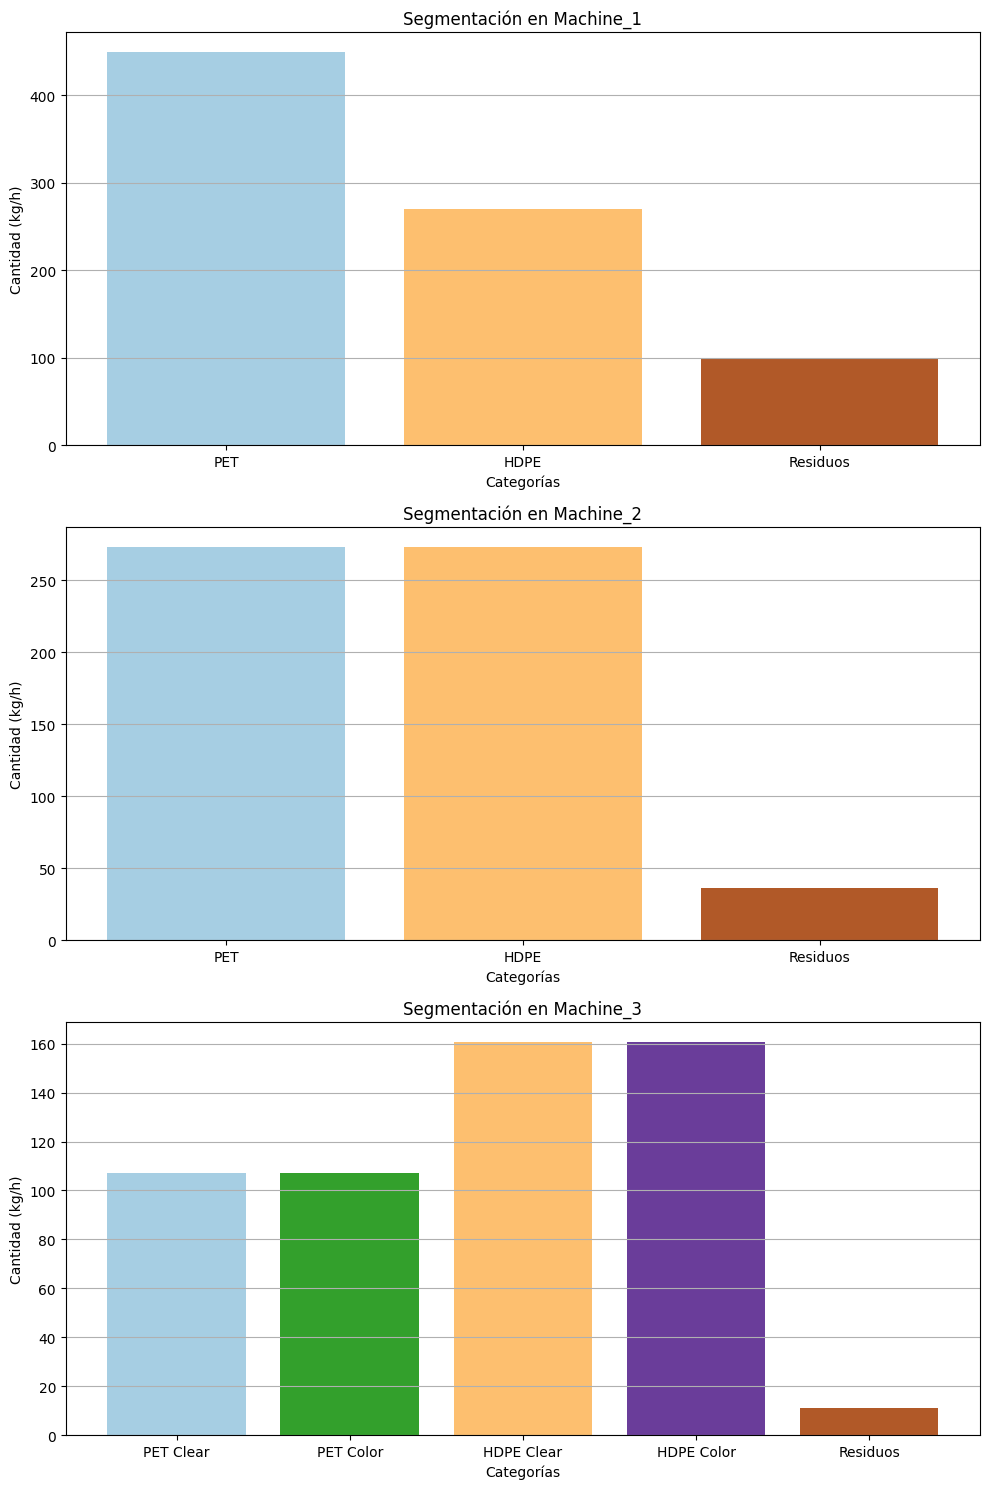

Ciclo 3 de simulación
[DEBUG] Simulando Máquina 1...
[DEBUG] Material segmented: {'PET': 450.0, 'HDPE': 270.0, 'Residuos': 100.0}
[DEBUG] Resultado Máquina 1: {'PET': 450.0, 'HDPE': 270.0, 'Residuos': 100.0}
[DEBUG] Simulando Máquina 2...
[DEBUG] Material segmented: {'PET': 273.6, 'HDPE': 273.6, 'Residuos': 36.0}
[DEBUG] Resultado Máquina 2: {'PET': 273.6, 'HDPE': 273.6, 'Residuos': 36.0}
[DEBUG] Simulando Máquina 3...
[DEBUG] Material segmented: {'PET Clear': 107.25120000000003, 'PET Color': 107.25120000000003, 'HDPE Clear': 160.87680000000003, 'HDPE Color': 160.87680000000003, 'Residuos': 10.944}
[DEBUG] Resultado Máquina 3: {'PET Clear': 107.25120000000003, 'PET Color': 107.25120000000003, 'HDPE Clear': 160.87680000000003, 'HDPE Color': 160.87680000000003, 'Residuos': 10.944}


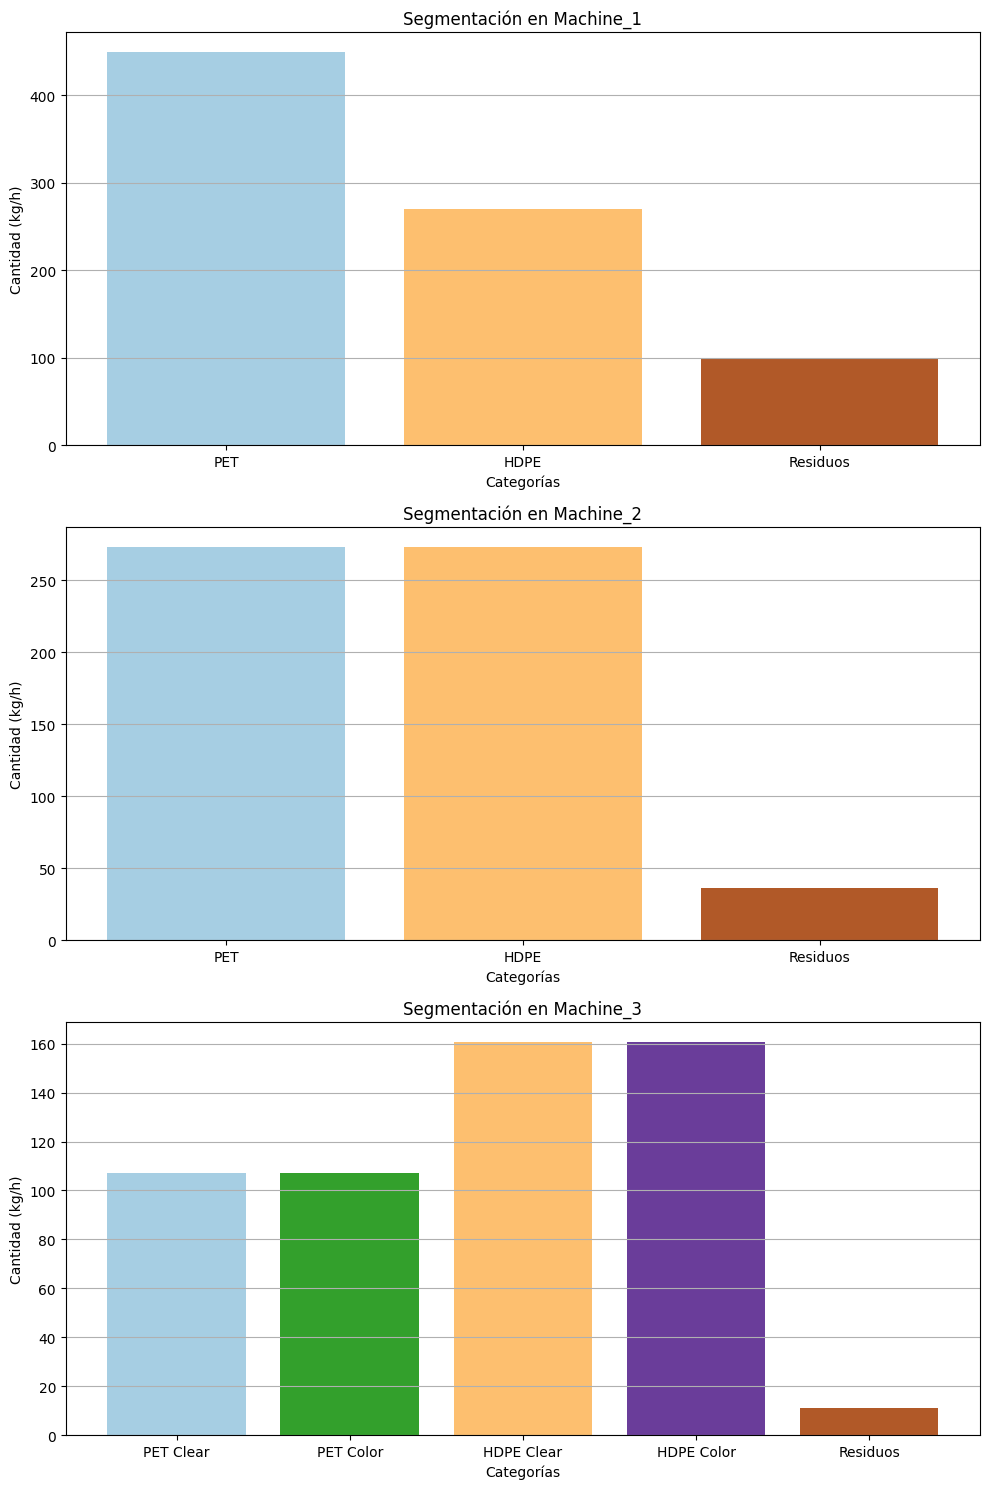

Ciclo 4 de simulación
[DEBUG] Simulando Máquina 1...
[DEBUG] Material segmented: {'PET': 450.0, 'HDPE': 270.0, 'Residuos': 100.0}
[DEBUG] Resultado Máquina 1: {'PET': 450.0, 'HDPE': 270.0, 'Residuos': 100.0}
[DEBUG] Simulando Máquina 2...
[DEBUG] Material segmented: {'PET': 273.6, 'HDPE': 273.6, 'Residuos': 36.0}
[DEBUG] Resultado Máquina 2: {'PET': 273.6, 'HDPE': 273.6, 'Residuos': 36.0}
[DEBUG] Simulando Máquina 3...
[DEBUG] Material segmented: {'PET Clear': 107.25120000000003, 'PET Color': 107.25120000000003, 'HDPE Clear': 160.87680000000003, 'HDPE Color': 160.87680000000003, 'Residuos': 10.944}
[DEBUG] Resultado Máquina 3: {'PET Clear': 107.25120000000003, 'PET Color': 107.25120000000003, 'HDPE Clear': 160.87680000000003, 'HDPE Color': 160.87680000000003, 'Residuos': 10.944}


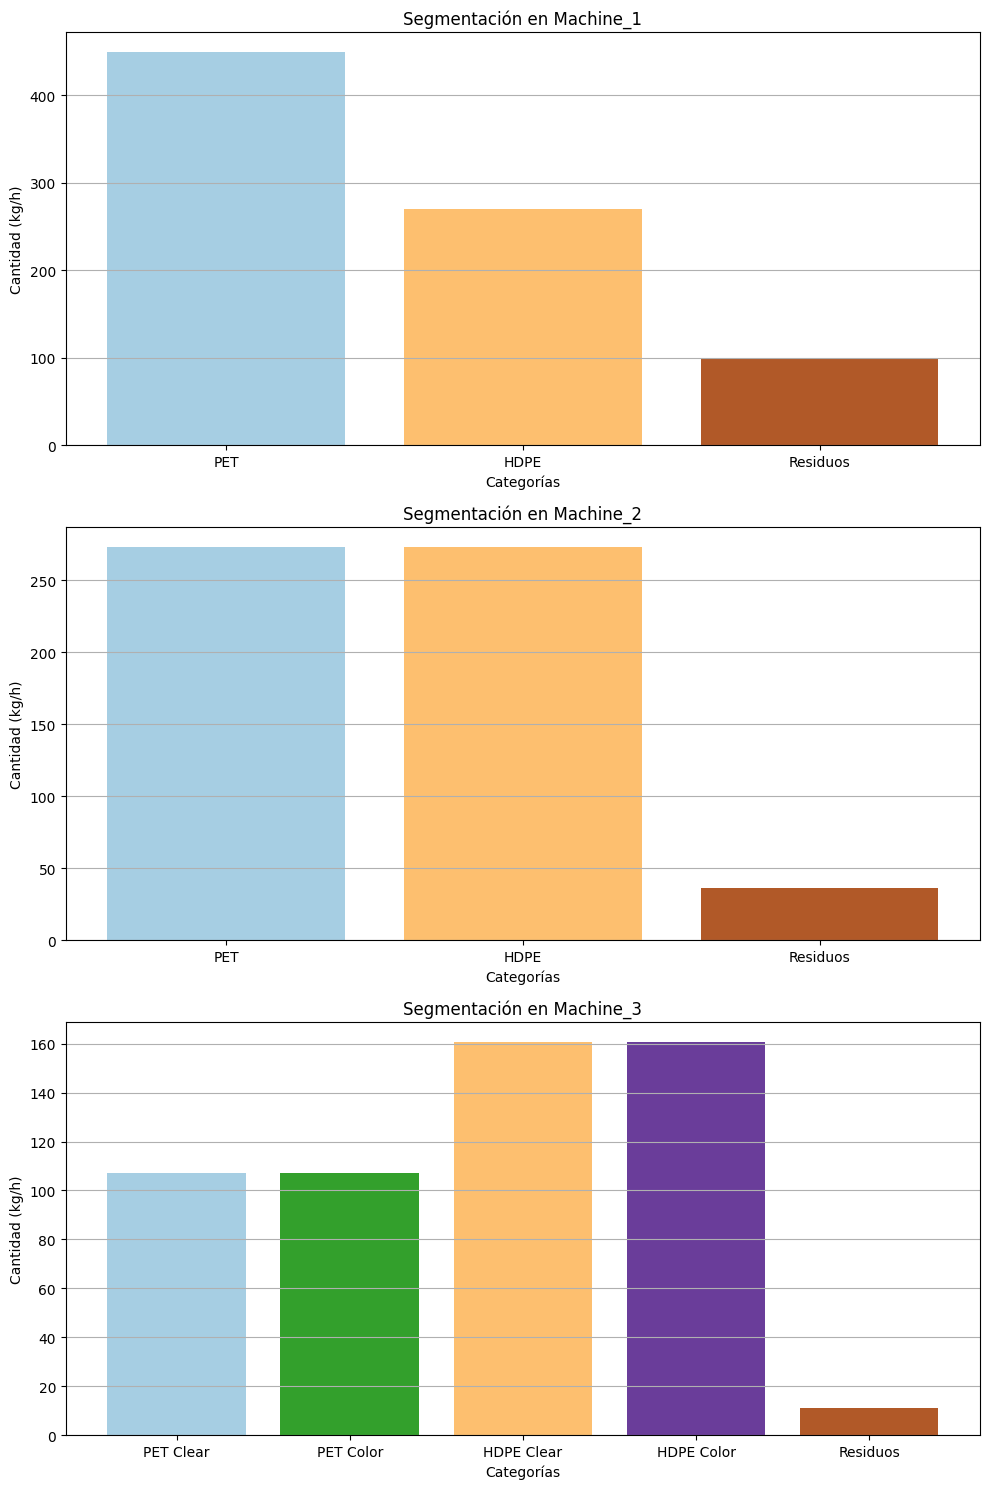

Ciclo 5 de simulación
[DEBUG] Simulando Máquina 1...
[DEBUG] Material segmented: {'PET': 450.0, 'HDPE': 270.0, 'Residuos': 100.0}
[DEBUG] Resultado Máquina 1: {'PET': 450.0, 'HDPE': 270.0, 'Residuos': 100.0}
[DEBUG] Simulando Máquina 2...
[DEBUG] Material segmented: {'PET': 273.6, 'HDPE': 273.6, 'Residuos': 36.0}
[DEBUG] Resultado Máquina 2: {'PET': 273.6, 'HDPE': 273.6, 'Residuos': 36.0}
[DEBUG] Simulando Máquina 3...
[DEBUG] Material segmented: {'PET Clear': 107.25120000000003, 'PET Color': 107.25120000000003, 'HDPE Clear': 160.87680000000003, 'HDPE Color': 160.87680000000003, 'Residuos': 10.944}
[DEBUG] Resultado Máquina 3: {'PET Clear': 107.25120000000003, 'PET Color': 107.25120000000003, 'HDPE Clear': 160.87680000000003, 'HDPE Color': 160.87680000000003, 'Residuos': 10.944}


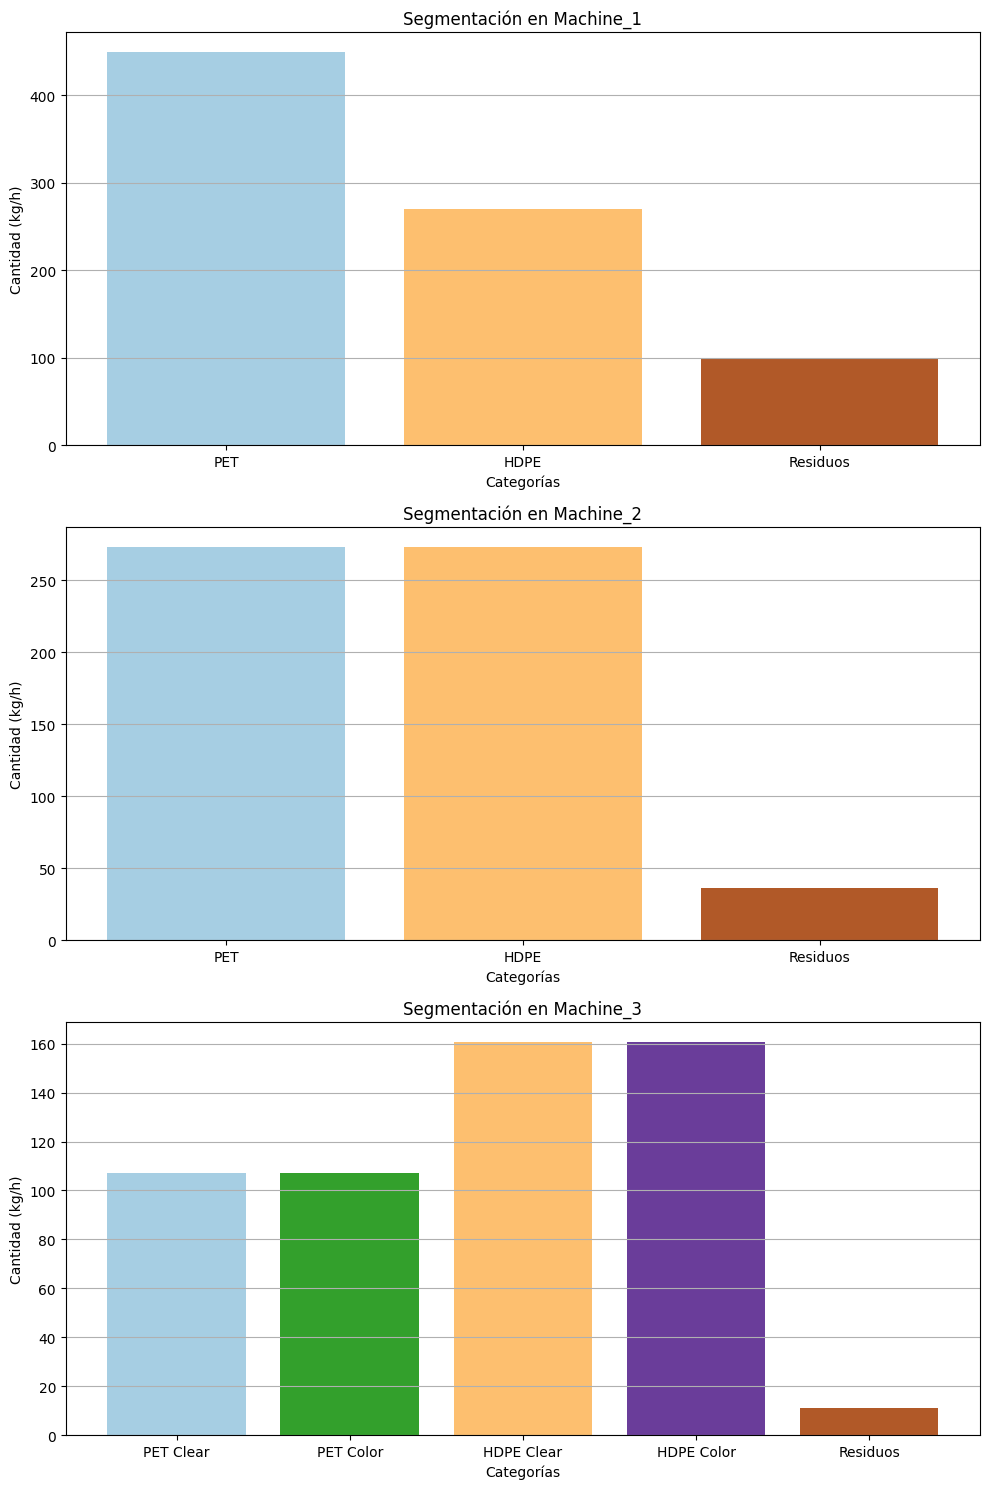

In [76]:
for cycle in range(cycles):
    print(f"Ciclo {cycle + 1} de simulación")
    flows = simulate_flow(initial_material, residue_percentages, {
        "machine_1": segment_ratios_machine_1,
        "machine_2": segment_ratios_machine_2,
        "machine_3": segment_ratios_machine_3,
    })
    visualize_flows(flows)
    time.sleep(1)  # Pausa entre ciclos

Exportar Resultados

In [77]:
results = pd.DataFrame.from_dict(flows, orient="index")
results.to_csv("simulation_results.csv")
print("Resultados exportados a simulation_results.csv")

Resultados exportados a simulation_results.csv
